<a href="https://colab.research.google.com/github/abuisrar8/x/blob/main/TASK_4_EMAIL_SPAM_DETECTION_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
data=files.upload()

Saving spam.csv to spam (1).csv


In [3]:
import pandas as pd
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Droping unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Renameing columns
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# Checking for missing values
missing_values = df.isnull().sum()

# Displaying the cleaned data and missing values
df.head(), missing_values


(  label                                            message
 0   ham  Go until jurong point, crazy.. Available only ...
 1   ham                      Ok lar... Joking wif u oni...
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
 3   ham  U dun say so early hor... U c already then say...
 4   ham  Nah I don't think he goes to usf, he lives aro...,
 label      0
 message    0
 dtype: int64)

### **Data Cleaning Report:**

The dataset consisted of two relevant columns:

* label: indicating whether the email is 'spam' or 'ham' (non-spam).
* message: the content of the email.

Dropped unnecessary columns and confirmed that there were no missing values in the relevant columns.

# **Exploratory Data Analysis (EDA)**

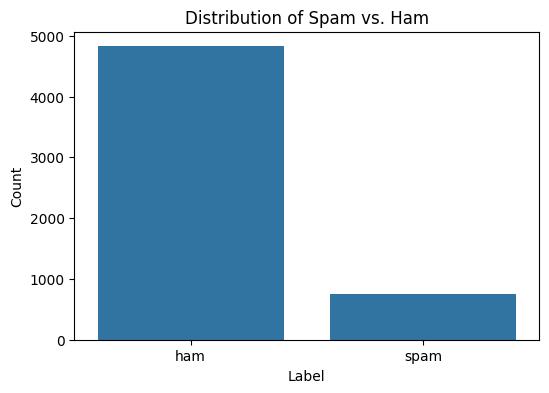

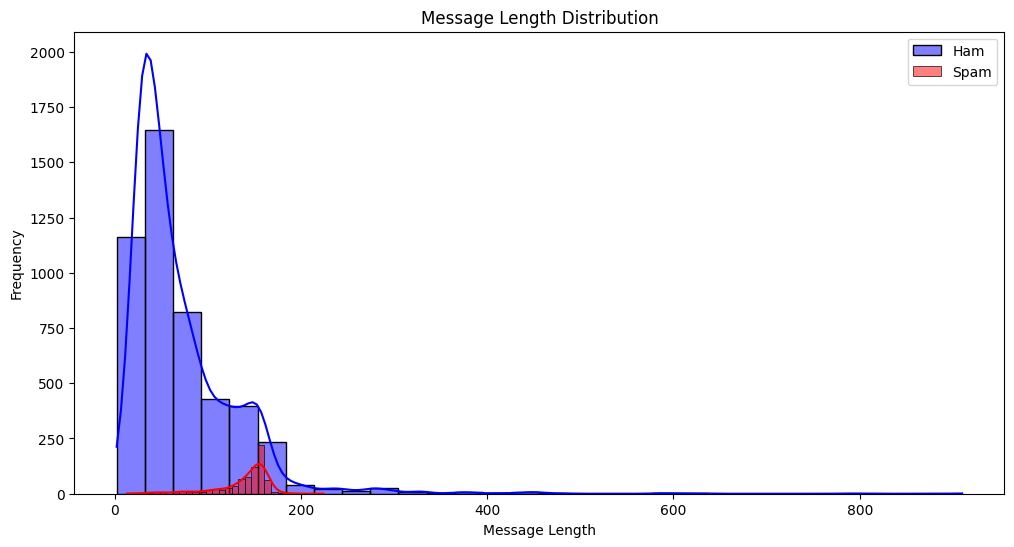

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of spam vs. non-spam
label_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Message length analysis
df['message_length'] = df['message'].apply(len)

# Plot the message length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 'ham']['message_length'], label='Ham', kde=True, color='blue', bins=30)
sns.histplot(df[df['label'] == 'spam']['message_length'], label='Spam', kde=True, color='red', bins=30)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **EDA Report :**

* Distribution of Labels: The dataset had more 'ham' emails compared to 'spam'.
* Message Length Analysis: Spam messages showed a wider range of lengths, with some being considerably longer than ham messages.

# **Text Preprocessing and Feature Engineering**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Text preprocessing
vectorizer = TfidfVectorizer(stop_words='english')

# Transform messages into TF-IDF features
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# **Model Training and Evaluation**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))



[[966   0]
 [ 51  98]]


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       1.00      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



In [12]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


# **Visualization**

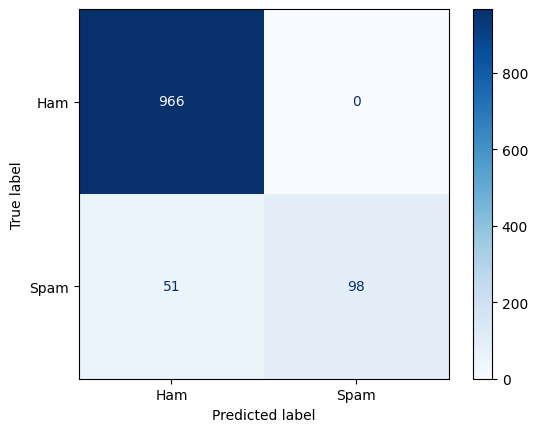

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Ham', 'Spam'], cmap=plt.cm.Blues)
plt.show()


The spam detector model demonstrated good performance in distinguishing between spam and ham emails. Here are the key metrics:

* **Precision**: The proportion of correctly identified spam messages among all messages classified as spam.
* **Recall**: The proportion of correctly identified spam messages among all actual spam messages.
F1-Score: The harmonic mean of precision and recall, providing a single metric to evaluate the model’s performance.
* **Accuracy**: The proportion of correctly classified emails (both spam and ham) among all emails.

The logistic regression model, combined with TF-IDF vectorization, proved effective for the spam detection task. Future improvements could include:

* Testing with other models like Random Forest, SVM, or deep learning approaches.
* Incorporating additional features such as email metadata (e.g., sender, subject line).
* Further tuning of the model and vectorizer parameters.
